In [6]:
import requests
import polars as pl

In [2]:
url = "http://127.0.0.1:8000/get_history"

In [3]:
results = requests.get(url)

In [ ]:
data = pl.from_records(results.json()).with_columns(
    pl.col('valuedate').str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S")
)

['valuedate', 'Kp', 'ap', 'D']

Text(0, 0.5, 'Kp Index')

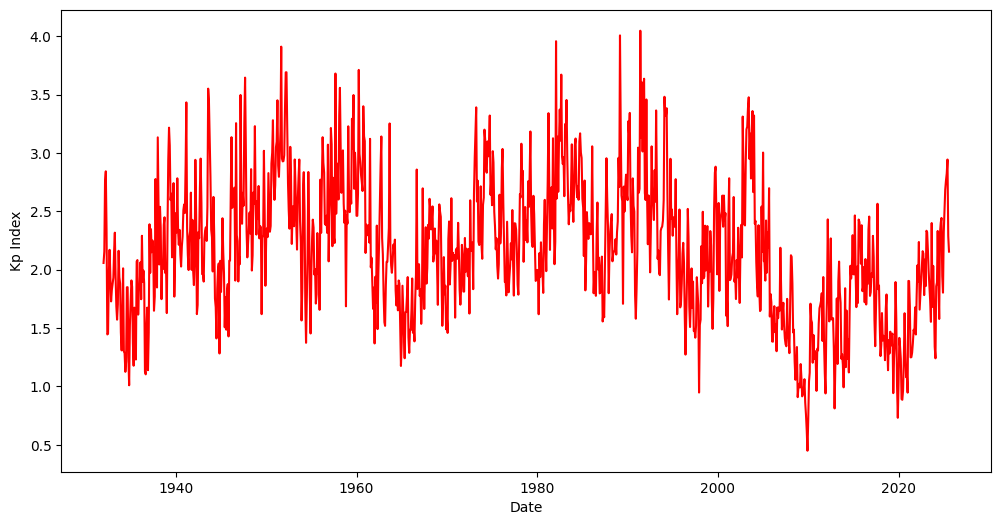

In [27]:
import matplotlib.pyplot as plt

date_month = data.group_by(pl.col('valuedate').dt.truncate('1mo')).agg(
    pl.col('Kp').mean().alias('Kp'),
    pl.col('Kp').max().alias('Kp_max'),
    pl.col('Kp').min().alias('Kp_min'),
).sort('valuedate')

fig = plt.figure(figsize=(12,6))
plt.plot(date_month['valuedate'], date_month['Kp'], color='red')
#plt.fill_between(date_month['valuedate'], date_month['Kp_min'], date_month['Kp_max'], alpha=0.2, color='blue')
plt.xlabel('Date')
plt.ylabel('Kp Index')